# Train model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler

from ipynb.fs.full.classifier_definitions import classifier1


Using TensorFlow backend.


In [2]:
# load data
f_path = 'training_data/trialB/y.txt'
y = pd.read_csv(f_path)
y = y.drop(y.columns[0],axis = 1)
y = y.drop(0,axis = 0)

f_path = 'training_data/trialB/X.txt'
X = pd.read_csv(f_path)
X = X.drop(X.columns[0],axis = 1)
X = X.drop(0,axis = 0)

In [3]:
# Normalize data
X_t = X.transpose()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_t)
X_scaled = pd.DataFrame(X_scaled.transpose())

In [4]:
# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13,stratify=y)

In [5]:
model = classifier1()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4080, 16)          288       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1020, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 1020, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 992, 32)           14880     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 248, 32)           0         
_________________________________________________________________
activation_2 (Activation)    (None, 248, 32)           0         
_________________________________________________________________
conv

In [6]:
# compile model (with lower learning rate)
ad = optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer = ad, metrics=['accuracy'])

In [7]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

In [8]:
# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
epochs = 50
batch_size = 10

# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
13176/13176 [==============================] - 131s 10ms/step - loss: 0.3308 - acc: 0.8419
Epoch 2/50
13176/13176 [==============================] - 116s 9ms/step - loss: 0.0537 - acc: 0.9879
Epoch 3/50
13176/13176 [==============================] - 105s 8ms/step - loss: 0.0137 - acc: 0.9957
Epoch 4/50
13176/13176 [==============================] - 122s 9ms/step - loss: 0.0102 - acc: 0.9975
Epoch 5/50
13176/13176 [==============================] - 110s 8ms/step - loss: 0.0047 - acc: 0.9989
Epoch 6/50
13176/13176 [==============================] - 106s 8ms/step - loss: 7.8691e-04 - acc: 1.0000
Epoch 7/50
13176/13176 [==============================] - 105s 8ms/step - loss: 0.0048 - acc: 0.9995
Epoch 8/50
13176/13176 [==============================] - 105s 8ms/step - loss: 0.0116 - acc: 0.9984
Epoch 9/50
13176/13176 [==============================] - 106s 8ms/step - loss: 0.0124 - acc: 0.9980
Epoch 10/50
13176/13176 [=============

KeyboardInterrupt: 

Stopped early since already converged

# Evaluate model

In [10]:
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)


1465/1465 [==============================] - 5s 3ms/step


In [11]:
print(accuracy)

1.0


In [12]:
# Save model
model.save('stage1_trailB.h5')  # creates a HDF5 file 'my_model.h5'

# See probability distribution of predictions on Xtest

No handles with labels found to put in legend.


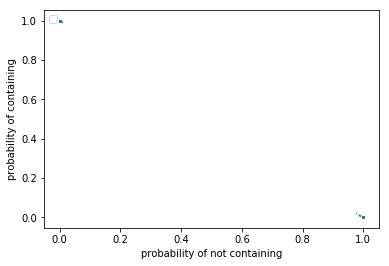

In [13]:
result1 = model.predict(X_test)
xx = result1[0:,0] #first column
yy = result1[0:,1] #second column

plt.scatter(xx, yy, s=1, alpha=0.5)
plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper left')
plt.show()

Notice there is more variation on the prediction probability of trail B than that of trial A, showing that this dataset is more complex